# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Loading and inspecting the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [3]:
df.shape

(333, 15)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.index

RangeIndex(start=0, stop=333, step=1)

In [6]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

## Preparing the data

In [7]:
# Relabel the columns for better understanding

In [8]:
new_cols = ["id","crime_rate", "prop_land", "prop_ind", "chas_dummy", "nit_ox_conc", "rooms", "prop_before1940", "dist_employ", "access_high", "tax", "pt_ratio", "black", "low_stat", "median_owner"]
df.columns = new_cols
df.head(2)

,id,crime_rate,prop_land,prop_ind,chas_dummy,nit_ox_conc,rooms,prop_before1940,dist_employ,access_high,tax,pt_ratio,black,low_stat,median_owner
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


## EDA: Built-in function & Plotting

* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [9]:
# Overview
df.describe()

,id,crime_rate,prop_land,prop_ind,chas_dummy,nit_ox_conc,rooms,prop_before1940,dist_employ,access_high,tax,pt_ratio,black,low_stat,median_owner
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [10]:
plt.style.use('seaborn-dark-palette')

Mean of Pupil-Teacher Ratio:         18.448048048047994
Median of Pupil-Teacher Ratio:       19.0
0.75 Quantil of Pupil-Teacher Ratio: 20.2

Conclusion: 75% of pupils in this dataset have a ratio of 1 teacher for 20 pupils.



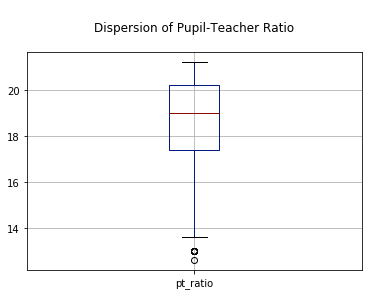

In [11]:
# Feature 1: Pupil-Teacher ratio by town 
print("Mean of Pupil-Teacher Ratio:         " + str(df.pt_ratio.mean()))
print("Median of Pupil-Teacher Ratio:       " + str(df.pt_ratio.median()))
print("0.75 Quantil of Pupil-Teacher Ratio: " + str(df.pt_ratio.quantile(.75)))
print("\nConclusion: 75% of pupils in this dataset have a ratio of 1 teacher for 20 pupils.\n")
df.pt_ratio.plot(kind='box', grid=True)
plt.title('\nDispersion of Pupil-Teacher Ratio\n');

### Comment  on pupil-teacher ratio: 
* 50% of the data in the upper half of the range


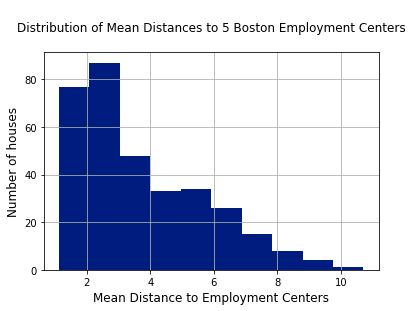

In [12]:
# Feature 2: Weighted mean of distances to five Boston employment centres
df.dist_employ.hist()
plt.title('\nDistribution of Mean Distances to 5 Boston Employment Centers\n')
plt.xlabel('Mean Distance to Employment Centers', fontsize=12)
plt.ylabel('Number of houses', fontsize=12);

### Comment on distance to employment centres:
* distribution right skewed: mode value far left, meaning most houses are near one of these 5 centres

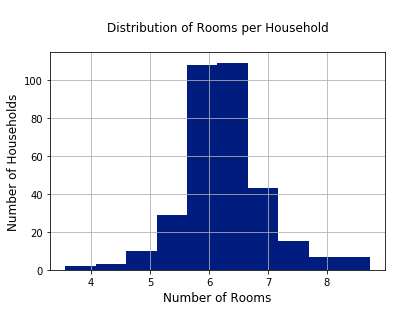

In [13]:
# Feature 3: Rooms per Household
df.rooms.hist()
plt.title('\nDistribution of Rooms per Household\n')
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Number of Households', fontsize=12);

### Comment on rooms:
* distribution almost normally: mode/mean/median = around 6 rooms

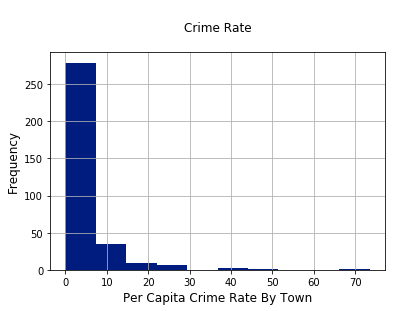

In [14]:
# Feature 4: Crime Rate
df.crime_rate.hist()
plt.title('\nCrime Rate\n')
plt.xlabel('Per Capita Crime Rate By Town', fontsize=12)
plt.ylabel('Frequency', fontsize=12);

### Comment on crime rate:
* Crime Rate extremely right-skewed, meaning most towns have a very low crime rate (mode value) and very few a higher one

## EDA: Subsets

* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new dataframes based on a certain split for crime rate.

In [15]:
# look up Accessing Data within Pandas, also for changing values

In [16]:
# See percentage of population with lower status for those living in houses 
# with rather long distances (>3) to employment centres.
df.loc[df["dist_employ"] > 3, "low_stat"].agg(['mean', 'median', 'std'])

mean      9.140888
median    8.430000
std       4.701031
Name: low_stat, dtype: float64

In [17]:
# See percentage of population with lower status for those living in houses
# with rather short distances (<=3) to employment centres.
df.loc[df["dist_employ"] <= 3, "low_stat"].agg(['mean', 'median', 'std'])

mean      15.992866
median    15.110000
std        7.415846
Name: low_stat, dtype: float64

### Comment
* People living near employment centres are much more likely to be poor.  -->  changing values

In [18]:
df.loc[df["dist_employ"] > 3, "low_stat"] = "not poor"
df.loc[df["dist_employ"] <= 3, "low_stat"] = "poor"
df.head()

,id,crime_rate,prop_land,prop_ind,chas_dummy,nit_ox_conc,rooms,prop_before1940,dist_employ,access_high,tax,pt_ratio,black,low_stat,median_owner
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,not poor,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,not poor,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,not poor,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,not poor,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,not poor,22.9


In [19]:
# create a new column, e.g. df['Num_Lines'] = df.linename.map(lambda x: len(x)
df.loc[df["rooms"] >= 7, "size"] = "big"
df.loc[df["rooms"] == 6 , "size"] = "middle"
df.loc[df["rooms"] <= 5, "size"] = "small"
df.head()

,id,crime_rate,prop_land,prop_ind,chas_dummy,nit_ox_conc,rooms,prop_before1940,dist_employ,access_high,tax,pt_ratio,black,low_stat,median_owner,size
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,not poor,24.0,NaN
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,not poor,21.6,NaN
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,not poor,33.4,NaN
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,not poor,36.2,big
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,not poor,22.9,NaN


In [20]:
# drop columns df = df.drop(['c/a', 'scp'], axis=1)
df = df.drop(['size', 'low_stat'], axis = 1)
df.head()

,id,crime_rate,prop_land,prop_ind,chas_dummy,nit_ox_conc,rooms,prop_before1940,dist_employ,access_high,tax,pt_ratio,black,median_owner
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,22.9


## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!